In [26]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import streamlit as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import datetime
import plotly as plotly
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import technical_analysis as ta
import feedparser

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error

In [27]:
!pip install tiingo

  Using cached tiingo-0.14.0-py2.py3-none-any.whl (13 kB)



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
symbols = ['BTCUSD', 'ETHUSD', 'LTCUSD','BCHUSD','XRPUSD','LINKUSD','ADAUSD','DOTUSD','UNIUSD','DOGEUSD','ETCUSD','MATICUSD',
           'BSVUSD','FILUSD','ATOMUSD','XLMUSD','AAVEUSD','CAKEUSD','SUSHIUSD','MKRUSD','AVAXUSD']


In [5]:
def main():
    if option == 'DataFrame':
        dataframe()
    elif option == 'Visualizations':
        visualization()
    else:
        predict()


In [6]:
def load_data(symbol, start_date, end_date):
    df = pdr.get_data_tiingo(symbol, start=start_date, end=end_date,api_key='d8c623538ff22efb5b7342a198b63b1e430e93f3')

    # df.isnull().sum()
    # df.duplicated().sum()

    df.drop(['adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'], axis=1, inplace = True)
    df.reset_index(inplace=True)
    df['date'] = pd.to_datetime(df['date']).dt.date
    df = df.set_index('date')

    return df

In [45]:
choice = input(f"Select an option {symbols}")
choice = choice.upper()
today = datetime.date.today()
duration = st.sidebar.number_input("Enter the duration ", value = 3000)
before = today - datetime.timedelta(days=duration)
start_date = st.sidebar.date_input('Start Date', value=before)
end_date = st.sidebar.date_input('End date', today)
if st.sidebar.button('Send'):
    if start_date < end_date:
        st.sidebar.success('Start date: `%s`\n\nEnd date: `%s`' %(start_date, end_date))
        load_data(choice, start_date, end_date)
    else:
        st.sidebar.error('Error: End date must fall after start date')

data = load_data(choice, start_date, end_date)

Select an option ['BTCUSD', 'ETHUSD', 'LTCUSD', 'BCHUSD', 'XRPUSD', 'LINKUSD', 'ADAUSD', 'DOTUSD', 'UNIUSD', 'DOGEUSD', 'ETCUSD', 'MATICUSD', 'BSVUSD', 'FILUSD', 'ATOMUSD', 'XLMUSD', 'AAVEUSD', 'CAKEUSD', 'SUSHIUSD', 'MKRUSD', 'AVAXUSD']LTCUSD


In [46]:
data.head()

,symbol,close,high,low,open,volume
date,,,,,,
2015-03-31,LTCUSD,1.030000,2.500000,1.020000,1.712999,5.0
2015-04-10,LTCUSD,2.290000,2.290000,2.290000,2.290000,1.0
2015-04-13,LTCUSD,1.030000,1.030000,1.030000,1.030000,2.0
2015-04-14,LTCUSD,1.399372,1.399372,1.294414,1.294414,8.0
2015-04-15,LTCUSD,1.402077,1.402077,1.316614,1.350022,15.0


This section provides insights to the data you have opted to use
            symbol      close       high        low       open         volume
date                                                                         
2023-05-09  LTCUSD  79.972349  80.155712  77.371776  77.798747  227930.784409
2023-05-10  LTCUSD  81.009993  82.102245  77.140980  79.965416  328041.868337
2023-05-11  LTCUSD  80.937098  82.020013  78.397681  80.993062  265215.037761
2023-05-12  LTCUSD  80.491278  81.533013  77.067457  80.933784  269860.933182
2023-05-13  LTCUSD  80.270335  81.124254  79.822627  80.481758  104214.463134
2023-05-14  LTCUSD  83.544521  84.036122  79.649010  80.268387  162552.334339
2023-05-15  LTCUSD  86.940975  88.635705  82.190040  83.539242  323666.670211
2023-05-16  LTCUSD  90.004041  90.537994  86.158077  86.937251  401620.085521
2023-05-17  LTCUSD  93.900000  94.999846  89.619948  90.000512  403034.375319
2023-05-18  LTCUSD  92.860000  94.218432  92.571814  93.880724   51229.170932

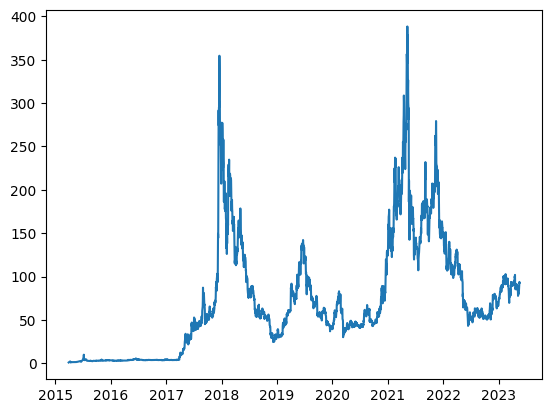

In [47]:
def dataframe():
    print("This section provides insights to the data you have opted to use")
    print(data.tail(10))
    print("DataFrame shape is",{data.shape})

    print("Missing values summary:")

    print(f"Summary Statistics of {choice} are:")
    print(data.describe())
    print("Close Data")
#     st.markdown("<span style='color:green'>Note: Hover on the chart and,"
#                 "click the arrow keys on the top right corner to view the chart for the entire time frame </span>",
#                 unsafe_allow_html=True)
    plt.plot(data['close'])
dataframe()

In [48]:
def analysis():
    data.plot(kind='hist',subplots=True,layout= (3,3),sharex=True)
    plt.show()
    
    #2
    columns = ['close','high','open','low','volume']
    
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

    for i, column in enumerate(columns):
        sns.kdeplot(data=data[column], ax=axes[i], fill=True)
        #axes.set_title(f'Density Plot of {column}')
    plt.tight_layout()
    plt.show()

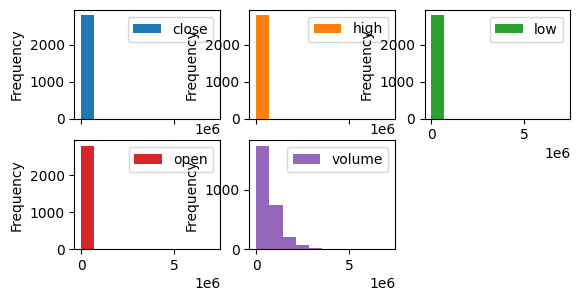

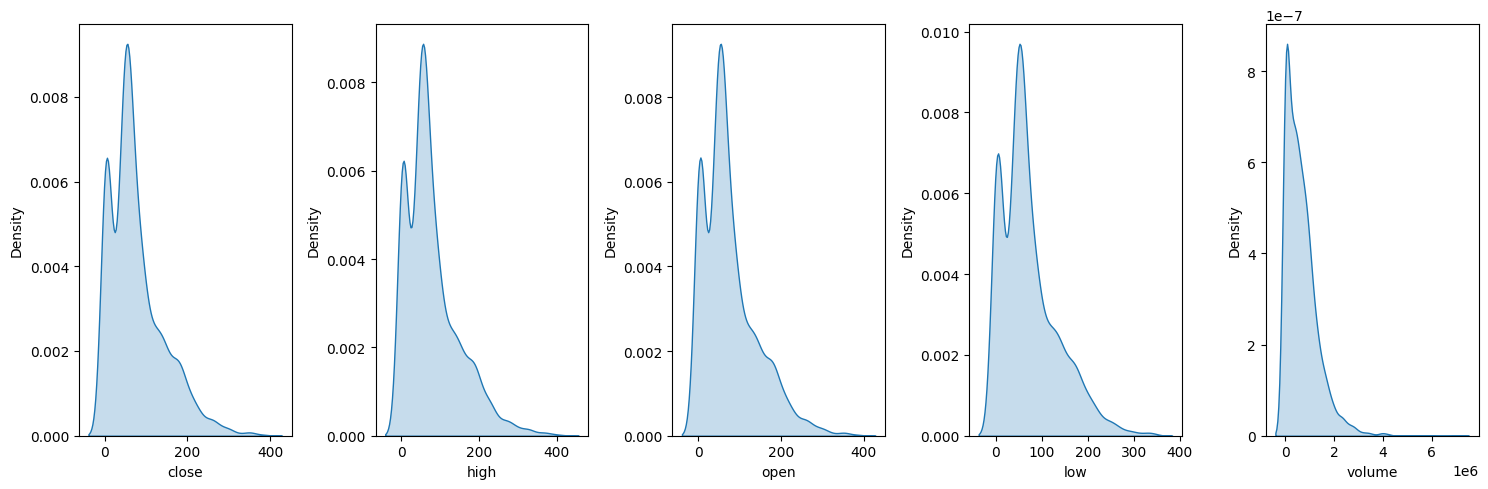

In [49]:
analysis()

In [50]:
correlation_values = data.corr(method='pearson')
print(correlation_values)

           close      high       low      open    volume
close   1.000000  0.997651  0.997239  0.994962  0.374957
high    0.997651  1.000000  0.994721  0.997273  0.385852
low     0.997239  0.994721  1.000000  0.995878  0.366662
open    0.994962  0.997273  0.995878  1.000000  0.377107
volume  0.374957  0.385852  0.366662  0.377107  1.000000


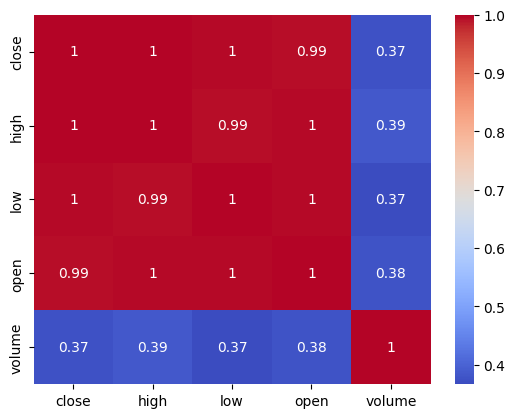

In [51]:
sns.heatmap(data.corr(method='pearson',numeric_only=True),cmap='coolwarm',annot=True)
plt.show()

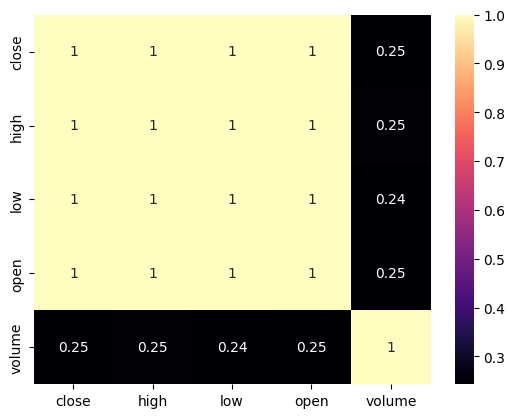

In [36]:
sns.heatmap(data.corr(method='pearson',numeric_only=True),cmap='magma',annot=True)
plt.show()

<Axes: >

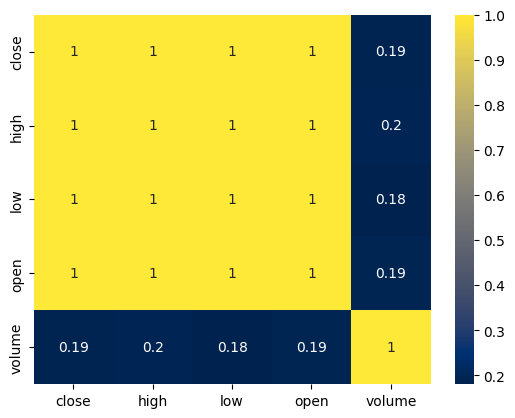

In [44]:
sns.heatmap(data.corr(method='pearson',numeric_only=True),cmap='cividis',annot=True)

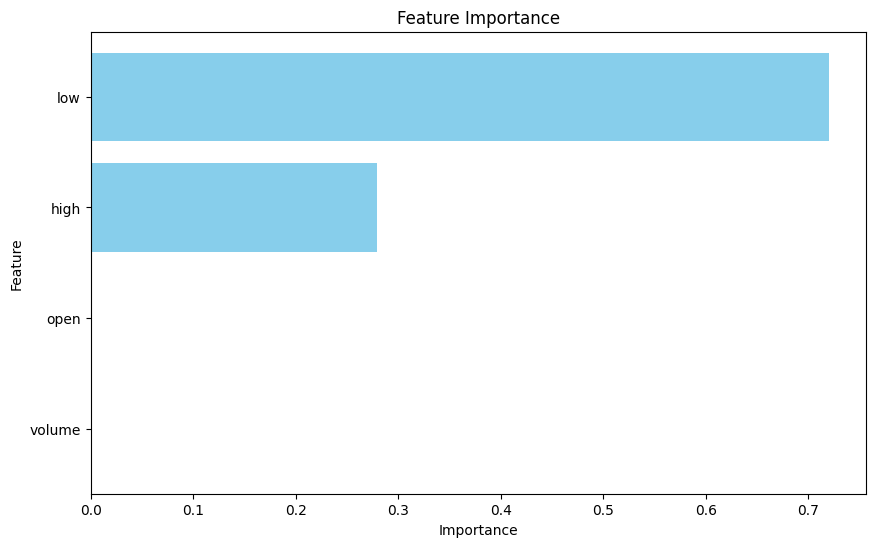

In [15]:
from sklearn.ensemble import RandomForestRegressor
def calculate_feature_importance(data):
    # Assuming that 'close' is your target variable
    X = data.drop(['close','symbol'], axis=1)
    y = data['close']

    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X, y)
    
    feature_importances = model.feature_importances_
    features = list(X.columns)
    
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

    return feature_importance_df

import matplotlib.pyplot as plt

def plot_feature_importance(feature_importance_df):
    # Setting the figure size
    plt.figure(figsize=(10, 6))

    # Creating a barh plot for the feature importances
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

    # Inverting the y-axis to have the feature with the highest importance at the top
    plt.gca().invert_yaxis()

    # Adding labels
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')

    plt.show()
# Calculate feature importance
feature_importance_df = calculate_feature_importance(data)

# Plot feature importance
plot_feature_importance(feature_importance_df)
